/Users/admin/opt/anaconda3/envs/pythonProject1/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32534 (\N{CJK UNIFIED IDEOGRAPH-7F16}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/admin/opt/anaconda3/envs/pythonProject1/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21495 (\N{CJK UNIFIED IDEOGRAPH-53F7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/admin/opt/anaconda3/envs/pythonProject1/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/admin/opt/anaconda3/envs/pythonProject1/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23545 (\N{CJK UNIFIED IDEOGRAPH-5BF9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/admin/opt/anaconda3/envs/pythonProject1/lib/python3.8/sit

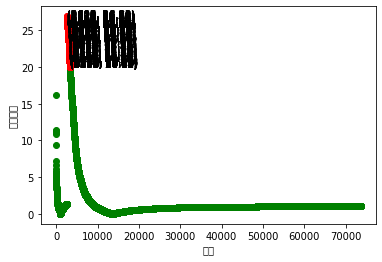

In [8]:
#-*- coding: utf-8 -*-
#使用K-Means算法聚类消费行为特征数据

import numpy as np
import pandas as pd

#参数初始化
# inputfile = '/Users/admin/PycharmProjects/pythonProject1/python_da/chapter5/demo/data/play_total.xlsx' # 播放次数明细
# outputfile = '/Users/admin/PycharmProjects/pythonProject1/python_da/chapter5/demo/tmp/playtime_tpye.xlsx' #保存结果的文件名

# inputfile = '/Users/admin/PycharmProjects/pythonProject1/python_da/chapter5/demo/data/consumption_data.xls' #销量及其他属性数据
# outputfile = '/Users/admin/PycharmProjects/pythonProject1/python_da/chapter5/demo/tmp/cm_plot_tpye.xlsx' #保存结果的文件名

inputfile = '/Users/admin/PycharmProjects/pythonProject1/python_da/chapter5/demo/data/playtime.xlsx'        # 播放时长数据
outputfile = '/Users/admin/PycharmProjects/pythonProject1/python_da/chapter5/demo/tmp/playtime_tpye1.xlsx'  # 保存结果的文件名


k = 2 #聚类的类别
threshold = 20 #【离散点阈值】
iteration =1000 #聚类最大循环次数
data = pd.read_excel(inputfile, index_col = 'id') #读取数据
data_zs = 1.0*(data - data.mean())/data.std() #数据标准化


from sklearn.cluster import KMeans
model = KMeans(n_clusters = k, max_iter = iteration) #分为k类，并发数4
model.fit(data_zs) #开始聚类


#标准化数据及其类别，详细输出原始数据及其类别
r = pd.concat([data_zs, pd.Series(model.labels_, index = data.index)], axis = 1)  #每个样本对应的类别
r.columns = list(data.columns) + [u'聚类类别'] #重命名表头
r.to_excel(outputfile) #保存结果

norm = []
for i in range(k): #逐一处理
#   norm_tmp = r[['R', 'F', 'M']][r[u'聚类类别'] == i]-model.cluster_centers_[i]
  norm_tmp = r[['h']][r[u'聚类类别'] == i]-model.cluster_centers_[i]
  norm_tmp = norm_tmp.apply(np.linalg.norm, axis = 1) #求出绝对距离
  norm.append(norm_tmp/norm_tmp.median()) #求相对距离并添加

norm = pd.concat(norm) #合并

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
norm[norm <= threshold].plot(style = 'go') #正常点

discrete_points = norm[norm > threshold] #离群点
discrete_points.plot(style = 'ro')

for i in range(len(discrete_points)): #离群点做标记
  id = discrete_points.index[i]
  n = discrete_points.iloc[i]
  plt.annotate('(%s, %0.2f)'%(id, n), xy = (id, n), xytext = (id, n))

plt.xlabel(u'编号')
plt.ylabel(u'相对距离')
plt.show()

